Checking https://www.google.com...
Website 'https://www.google.com' is UP.
Response time: 0.81 seconds.
CNN Analysis: Not an Image
Record added to blockchain.

Checking https://www.example.com...
Website 'https://www.example.com' is UP.
Response time: 2.52 seconds.
CNN Analysis: Not an Image
Record added to blockchain.

Checking https://www.nonexistentwebsite.xyz...
An error occurred while checking 'https://www.nonexistentwebsite.xyz': HTTPSConnectionPool(host='www.nonexistentwebsite.xyz', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000171028AA1C8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

Blockchain Data:
{'index': 1, 'timestamp': '2025-01-22 20:42:40.916460', 'data': None, 'previous_hash': '0', 'hash': '1df411a9e737d89cd5f71e866aaff35fafe3e52de9c01558a54cc2222d808626'}
{'index': 2, 'timestamp': '2025-01-22 20:42:41.726177', 'data': {'url': 'https://www.google.com', 'stat

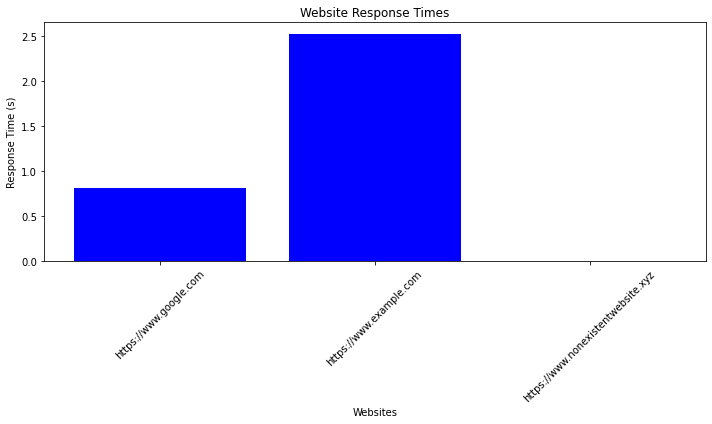

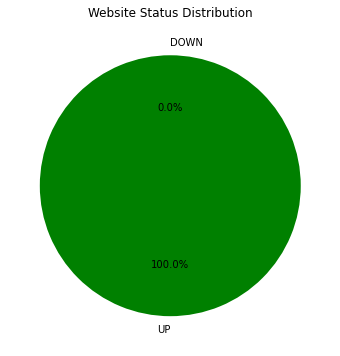

In [2]:
import requests
import hashlib
import tensorflow as tf
from tensorflow.keras import layers, models
from datetime import datetime
import numpy as np
from PIL import Image, UnidentifiedImageError
from io import BytesIO
import matplotlib.pyplot as plt

# Define a simple blockchain class
class Blockchain:
    def __init__(self):
        self.chain = []
        self.create_block(previous_hash="0")  # Genesis block

    def create_block(self, data=None, previous_hash="0"):
        block = {
            "index": len(self.chain) + 1,
            "timestamp": str(datetime.now()),
            "data": data,
            "previous_hash": previous_hash,
            "hash": None,
        }
        block["hash"] = self.hash_block(block)
        self.chain.append(block)
        return block

    @staticmethod
    def hash_block(block):
        encoded_block = str(block).encode()
        return hashlib.sha256(encoded_block).hexdigest()

    def get_last_block(self):
        return self.chain[-1] if self.chain else None

# Create a simple CNN model
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(3, activation="softmax")  # 3 classes: Normal, Suspicious, Error
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# Load a pre-trained model (for demonstration, train your own model for real use cases)
cnn_model = create_cnn_model()

# Mock CNN prediction (simulated, replace with actual predictions in a real model)
def cnn_predict(image_data):
    image_data = image_data.resize((64, 64))  # Resize to model input size
    image_array = np.array(image_data) / 255.0  # Normalize
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    predictions = cnn_model.predict(image_array)
    classes = ["Normal", "Suspicious", "Error"]
    return classes[np.argmax(predictions)]

# Function to check website status and analyze with CNN
def check_website(url, blockchain):
    try:
        start_time = datetime.now()
        response = requests.get(url, timeout=5)
        end_time = datetime.now()

        # Calculate response time
        response_time = (end_time - start_time).total_seconds()

        # Determine status
        status = "UP" if response.status_code == 200 else "DOWN"
        status_code = response.status_code

        # Analyze website content with CNN
        cnn_result = "Not an Image"
        if status == "UP" and "image" in response.headers.get("Content-Type", ""):
            try:
                image_data = Image.open(BytesIO(response.content))  # Open image
                cnn_result = cnn_predict(image_data)
            except UnidentifiedImageError:
                cnn_result = "Invalid Image"

        # Add record to blockchain
        data = {
            "url": url,
            "status": status,
            "status_code": status_code,
            "response_time": response_time,
            "cnn_analysis": cnn_result,
            "checked_at": str(datetime.now()),
        }
        blockchain.create_block(data=data)

        # Print website status
        print(f"Website '{url}' is {status}.")
        print(f"Response time: {response_time:.2f} seconds.")
        print(f"CNN Analysis: {cnn_result}")
        print(f"Record added to blockchain.\n")
    except requests.exceptions.RequestException as e:
        print(f"An error occurred while checking '{url}': {e}")
        # Log error in blockchain
        blockchain.create_block(data={"url": url, "error": str(e)})

# Visualize blockchain data using matplotlib
def visualize_blockchain(blockchain):
    urls = []
    response_times = []
    statuses = {"UP": 0, "DOWN": 0}

    for block in blockchain.chain:
        data = block.get("data", {})
        if data:
            url = data.get("url", "Unknown")
            status = data.get("status", "Unknown")
            response_time = data.get("response_time", 0)

            urls.append(url)
            response_times.append(response_time)

            if status in statuses:
                statuses[status] += 1

    # Plot response times
    plt.figure(figsize=(10, 6))
    plt.bar(urls, response_times, color='blue')
    plt.xlabel("Websites")
    plt.ylabel("Response Time (s)")
    plt.title("Website Response Times")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot status distribution
    plt.figure(figsize=(6, 6))
    plt.pie(statuses.values(), labels=statuses.keys(), autopct="%1.1f%%", startangle=90, colors=["green", "red"])
    plt.title("Website Status Distribution")
    plt.show()

# Initialize blockchain
blockchain = Blockchain()

# List of websites to check
websites = [
    "https://www.google.com",
    "https://www.example.com",
    "https://www.nonexistentwebsite.xyz"
]

# Check each website
for website in websites:
    print(f"Checking {website}...")
    check_website(website, blockchain)

# Display blockchain data
print("\nBlockchain Data:")
for block in blockchain.chain:
    print(block)

# Visualize blockchain data
visualize_blockchain(blockchain)


# Using three commercial websites traffic data

# Using Block Chain Technology

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Checking https://www.google.com...
Website 'https://www.google.com' is UP.
Response time: 0.50 seconds.
CNN Analysis: Not an Image
Record added to blockchain.

Checking https://www.example.com...
Website 'https://www.example.com' is UP.
Response time: 0.48 seconds.
CNN Analysis: Not an Image
Record added to blockchain.

Checking https://www.yahoo.com...
An error occurred while checking 'https://www.yahoo.com': HTTPSConnectionPool(host='www.yahoo.com', port=443): Read timed out.

Blockchain Data:
{'index': 1, 'timestamp': '2025-01-22 21:09:00.581983', 'data': None, 'previous_hash': '0', 'hash': '94ddf6e6ea42b899dabe64a87d9a47e958e293ecdcf8d9dd3ad292c9b875d47c'}
{'index': 2, 'timestamp': '2025-01-22 21:09:01.080029', 'data': {'url': 'https://www.google.com', 'status': 'UP', 'status_code': 200, 'response_time': 0.498046, 'cnn_analysis': 'Not an Image', 'checked_at': '2025-01-22 21:09:01.080029'}, 'previous_ha

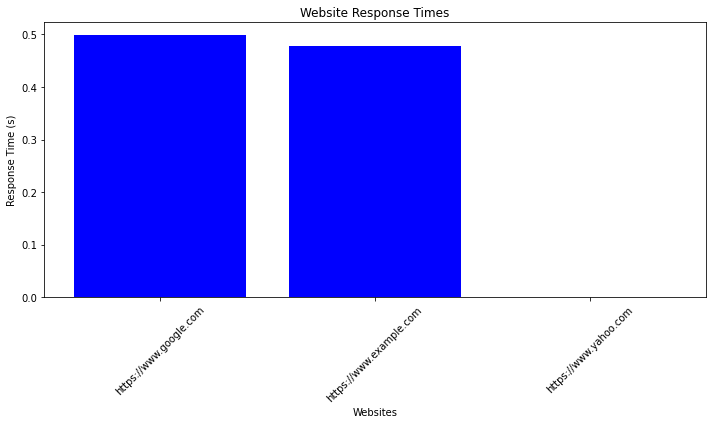

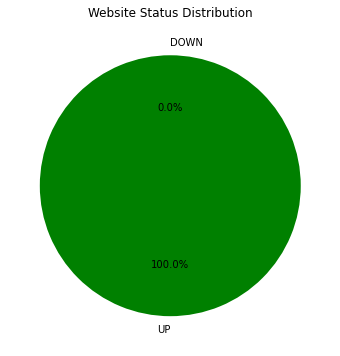

In [1]:
import requests
import hashlib
import tensorflow as tf
from tensorflow.keras import layers, models
from datetime import datetime
import numpy as np
from PIL import Image, UnidentifiedImageError
from io import BytesIO
import matplotlib.pyplot as plt

# Define a simple blockchain class
class Blockchain:
    def __init__(self):
        self.chain = []
        self.create_block(previous_hash="0")  # Genesis block

    def create_block(self, data=None, previous_hash="0"):
        block = {
            "index": len(self.chain) + 1,
            "timestamp": str(datetime.now()),
            "data": data,
            "previous_hash": previous_hash,
            "hash": None,
        }
        block["hash"] = self.hash_block(block)
        self.chain.append(block)
        return block

    @staticmethod
    def hash_block(block):
        encoded_block = str(block).encode()
        return hashlib.sha256(encoded_block).hexdigest()

    def get_last_block(self):
        return self.chain[-1] if self.chain else None

# Create a simple CNN model
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(3, activation="softmax")  # 3 classes: Normal, Suspicious, Error
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# Load a pre-trained model (for demonstration, train your own model for real use cases)
cnn_model = create_cnn_model()

# Mock CNN prediction (simulated, replace with actual predictions in a real model)
def cnn_predict(image_data):
    image_data = image_data.resize((64, 64))  # Resize to model input size
    image_array = np.array(image_data) / 255.0  # Normalize
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    predictions = cnn_model.predict(image_array)
    classes = ["Normal", "Suspicious", "Error"]
    return classes[np.argmax(predictions)]

# Function to check website status and analyze with CNN
def check_website(url, blockchain):
    try:
        start_time = datetime.now()
        response = requests.get(url, timeout=5)
        end_time = datetime.now()

        # Calculate response time
        response_time = (end_time - start_time).total_seconds()

        # Determine status
        status = "UP" if response.status_code == 200 else "DOWN"
        status_code = response.status_code

        # Analyze website content with CNN
        cnn_result = "Not an Image"
        if status == "UP" and "image" in response.headers.get("Content-Type", ""):
            try:
                image_data = Image.open(BytesIO(response.content))  # Open image
                cnn_result = cnn_predict(image_data)
            except UnidentifiedImageError:
                cnn_result = "Invalid Image"

        # Add record to blockchain
        data = {
            "url": url,
            "status": status,
            "status_code": status_code,
            "response_time": response_time,
            "cnn_analysis": cnn_result,
            "checked_at": str(datetime.now()),
        }
        blockchain.create_block(data=data)

        # Print website status
        print(f"Website '{url}' is {status}.")
        print(f"Response time: {response_time:.2f} seconds.")
        print(f"CNN Analysis: {cnn_result}")
        print(f"Record added to blockchain.\n")
    except requests.exceptions.RequestException as e:
        print(f"An error occurred while checking '{url}': {e}")
        # Log error in blockchain
        blockchain.create_block(data={"url": url, "error": str(e)})

# Visualize blockchain data using matplotlib
def visualize_blockchain(blockchain):
    urls = []
    response_times = []
    statuses = {"UP": 0, "DOWN": 0}

    for block in blockchain.chain:
        data = block.get("data", {})
        if data:
            url = data.get("url", "Unknown")
            status = data.get("status", "Unknown")
            response_time = data.get("response_time", 0)

            urls.append(url)
            response_times.append(response_time)

            if status in statuses:
                statuses[status] += 1

    # Plot response times
    plt.figure(figsize=(10, 6))
    plt.bar(urls, response_times, color='blue')
    plt.xlabel("Websites")
    plt.ylabel("Response Time (s)")
    plt.title("Website Response Times")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot status distribution
    plt.figure(figsize=(6, 6))
    plt.pie(statuses.values(), labels=statuses.keys(), autopct="%1.1f%%", startangle=90, colors=["green", "red"])
    plt.title("Website Status Distribution")
    plt.show()

# Initialize blockchain
blockchain = Blockchain()

# List of websites to check
websites = [
    "https://www.google.com",
    "https://www.example.com",
    "https://www.yahoo.com"
]

# Check each website
for website in websites:
    print(f"Checking {website}...")
    check_website(website, blockchain)

# Display blockchain data
print("\nBlockchain Data:")
for block in blockchain.chain:
    print(block)

# Visualize blockchain data
visualize_blockchain(blockchain)
